In [7]:
%matplotlib inline
import sys
from simulation_toykit_sources import *

sys.path.append('../virtuallab/tools')
from common import *

def get_ipynb_dir():
    return "../virtuallab/pynb/sources/plane_wave/"

notebook_dir = get_ipynb_dir()
degree       = np.pi/180
wavelength   = 0.5
start  = [-5, -5] # 'um'
end    = [5, 5]
shape  = [100, 100]

step   = [(b-a)/N for a,b,N in zip(start, end, shape)]
meta   = {
    "dx" : step[0] * 1e-3, # set display unit to 'mm'
    "dy" : step[1] * 1e-3,
    "nx" : shape[0],
    "ny" : shape[1]
}

display_pos = [[0,0], [0,1], [1, 0], [1, 1]]
# display_pos = [[0,0], [0,1], [0,2], [0,3]]

* plane wave with theta=30, phi=0
    max error = 0.31286893008045524


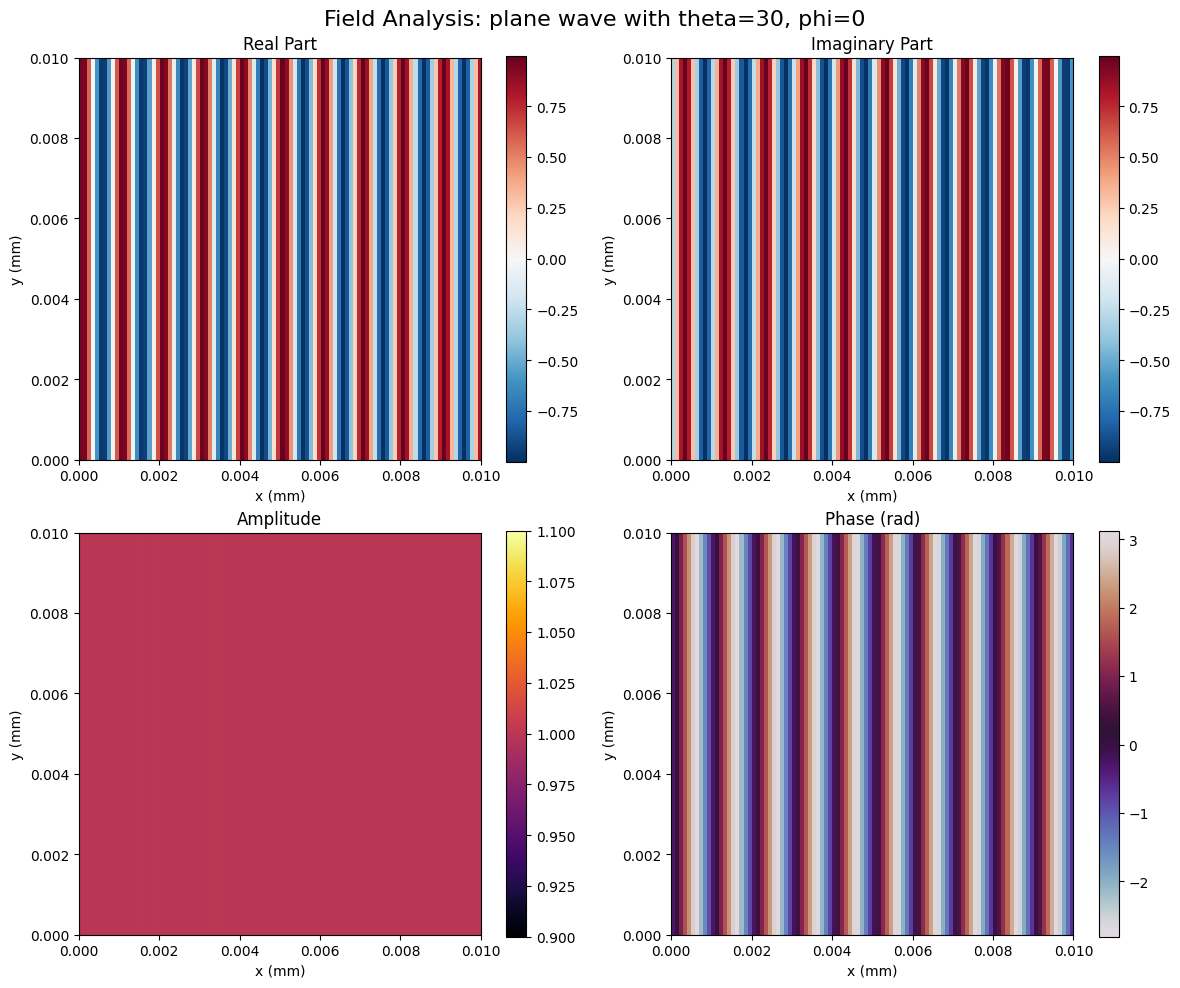

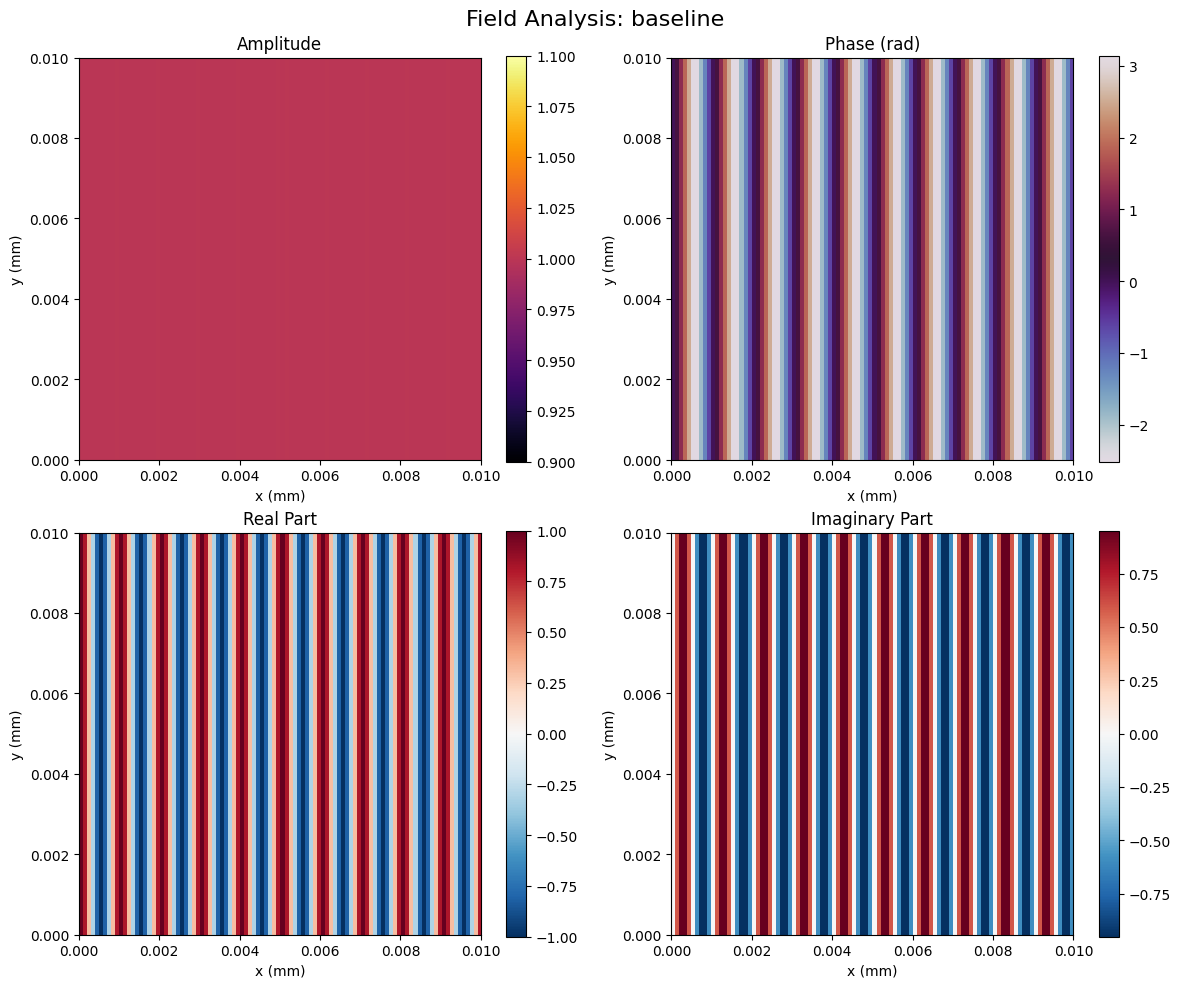

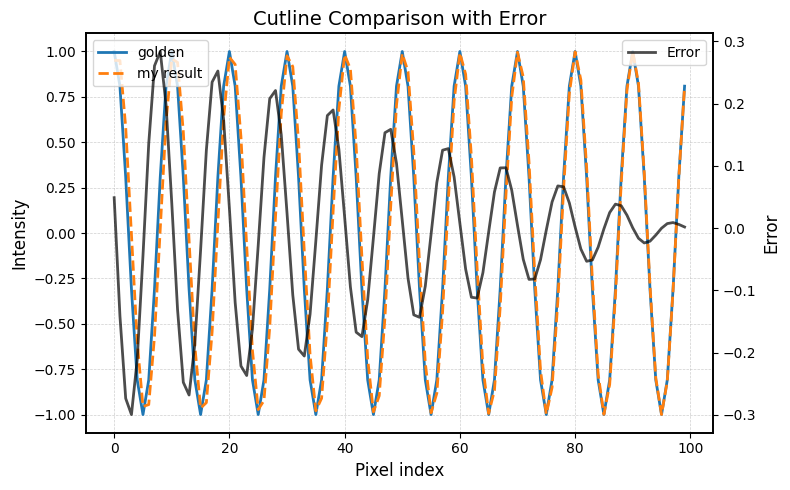

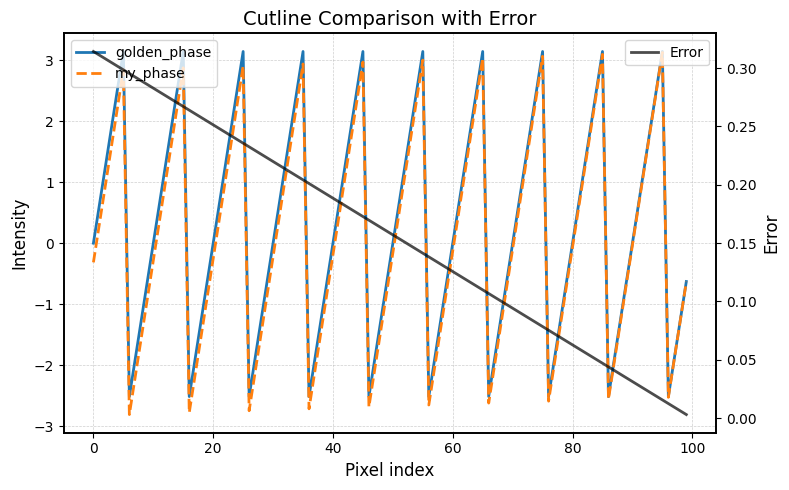

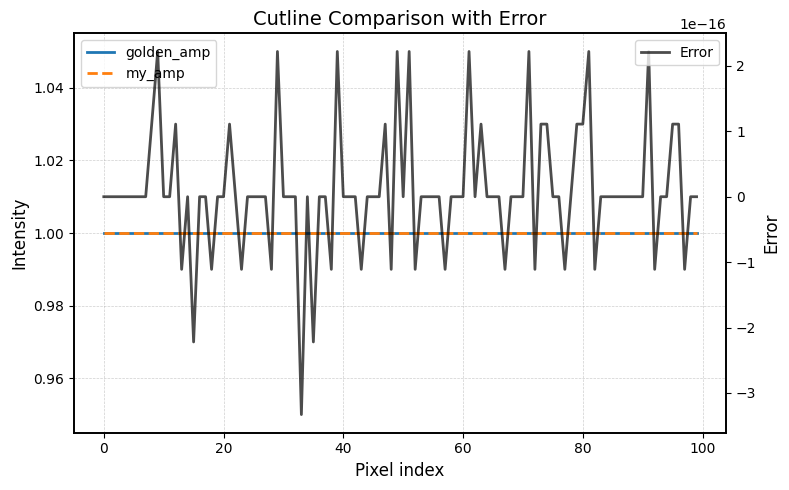

* plane wave with theta=45, phi=0
    max error = 0.4406431746709172


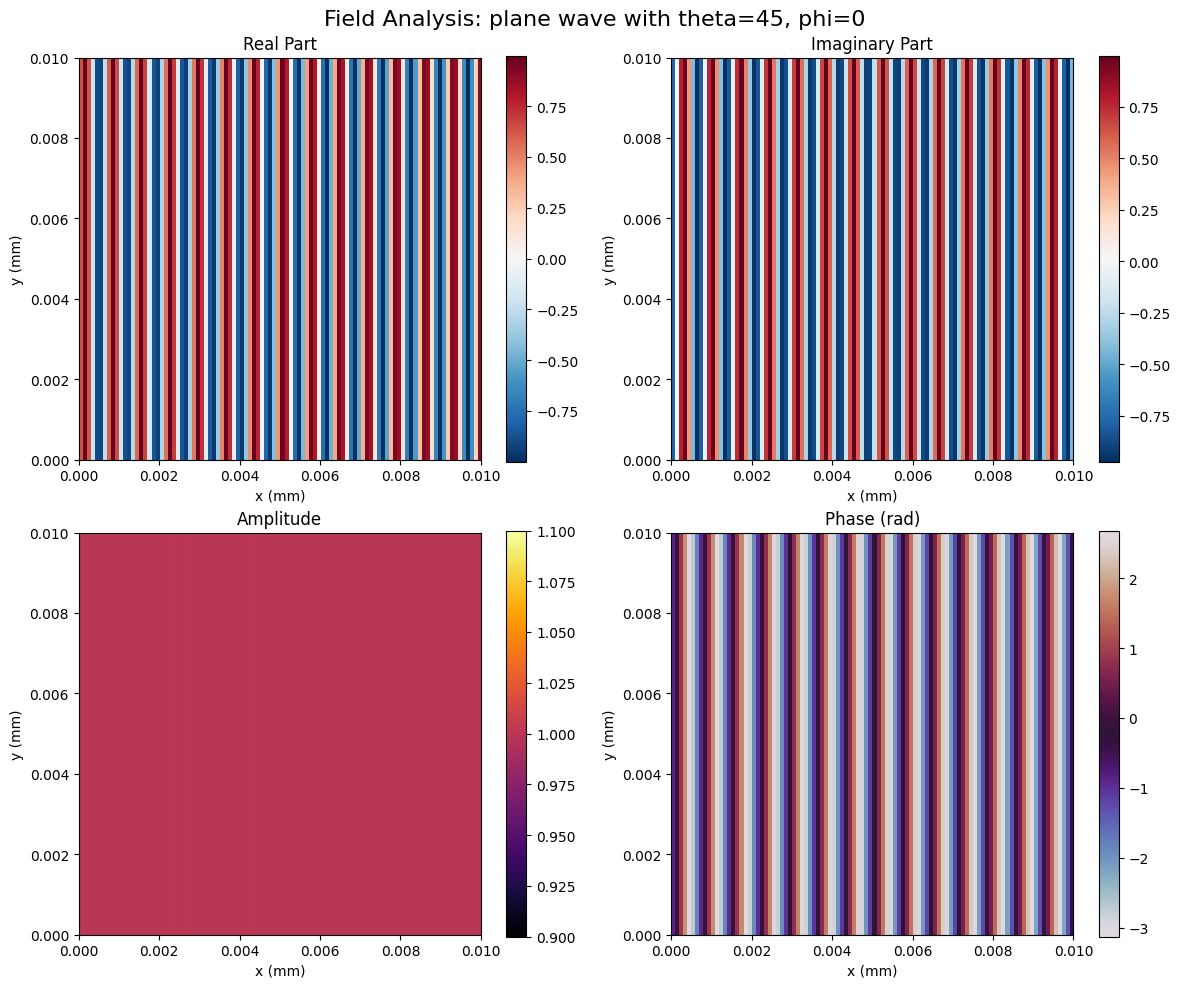

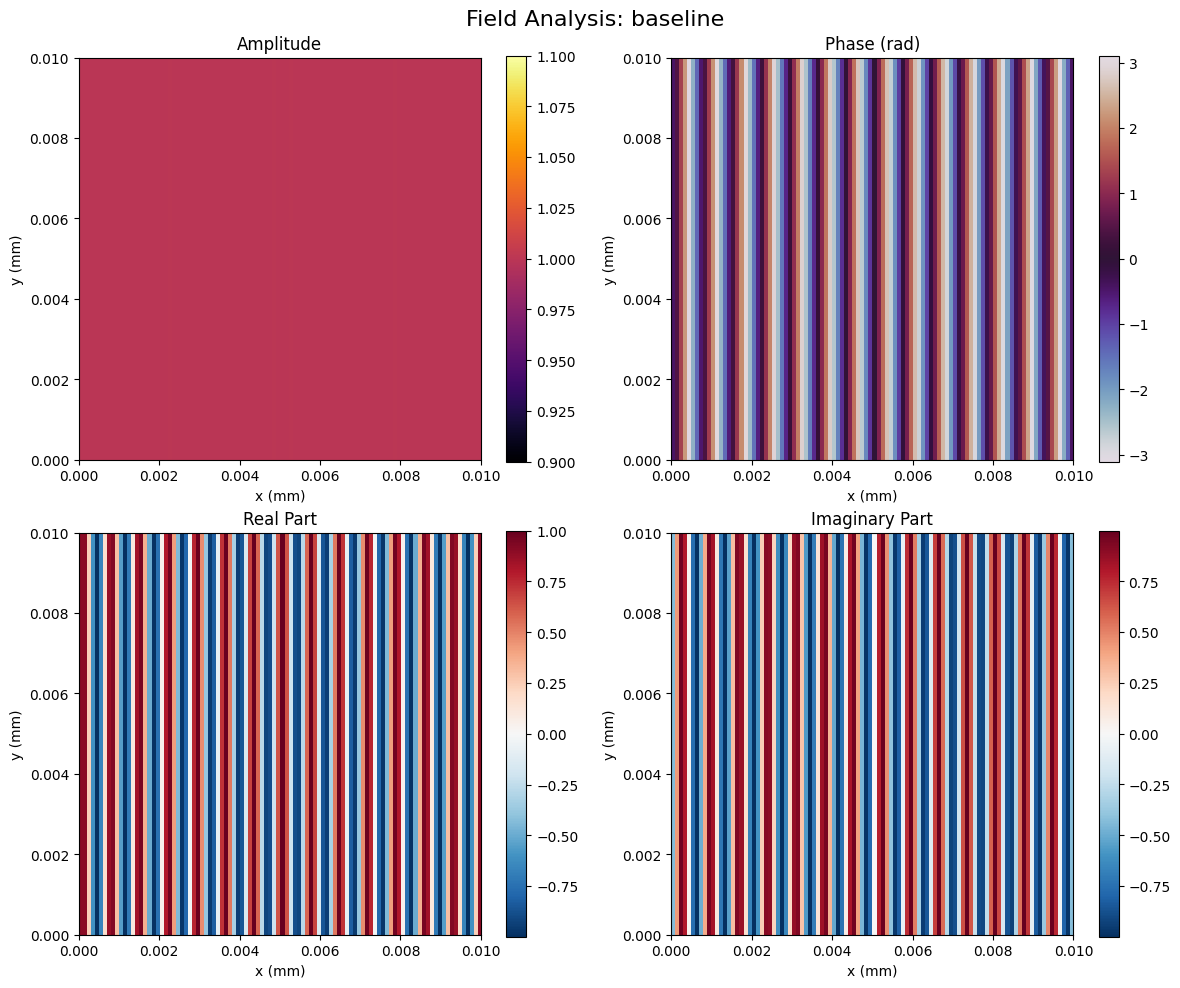

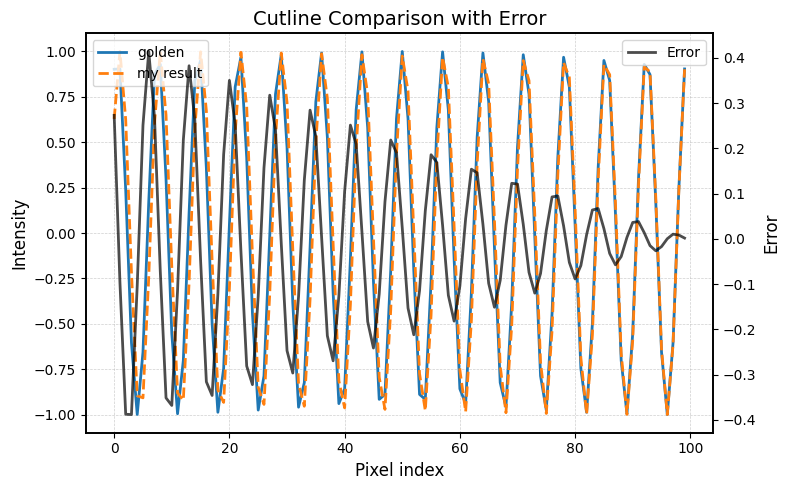

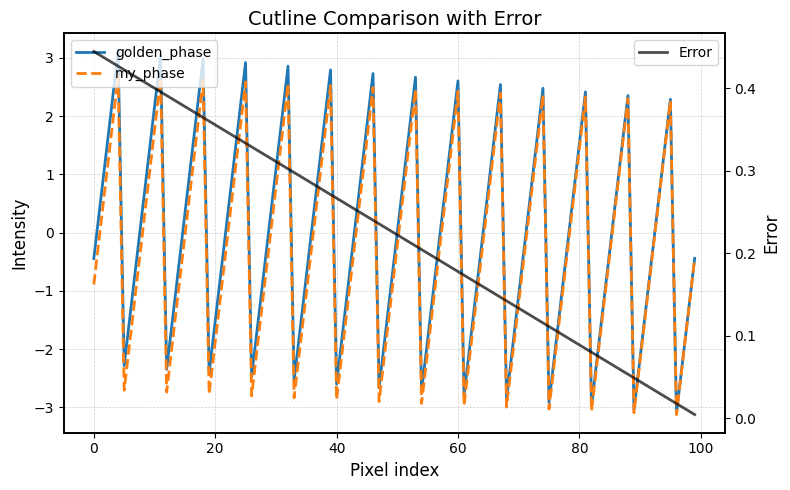

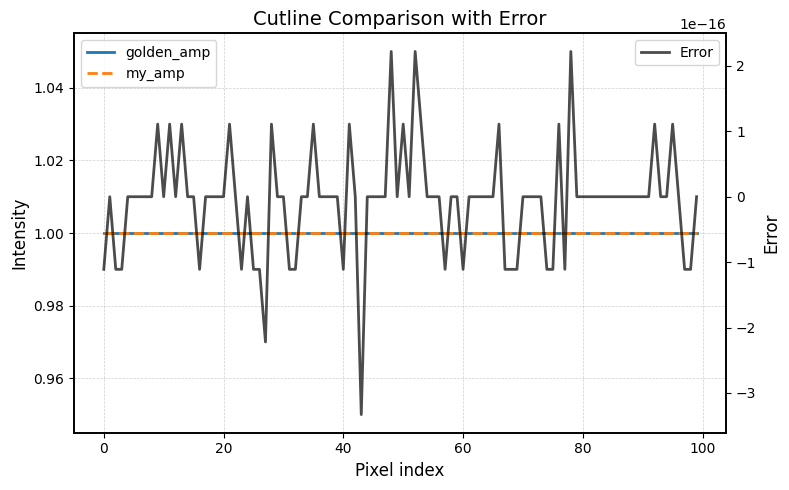

* plane wave with theta=75, phi=0
    max error = 0.5976373849628532


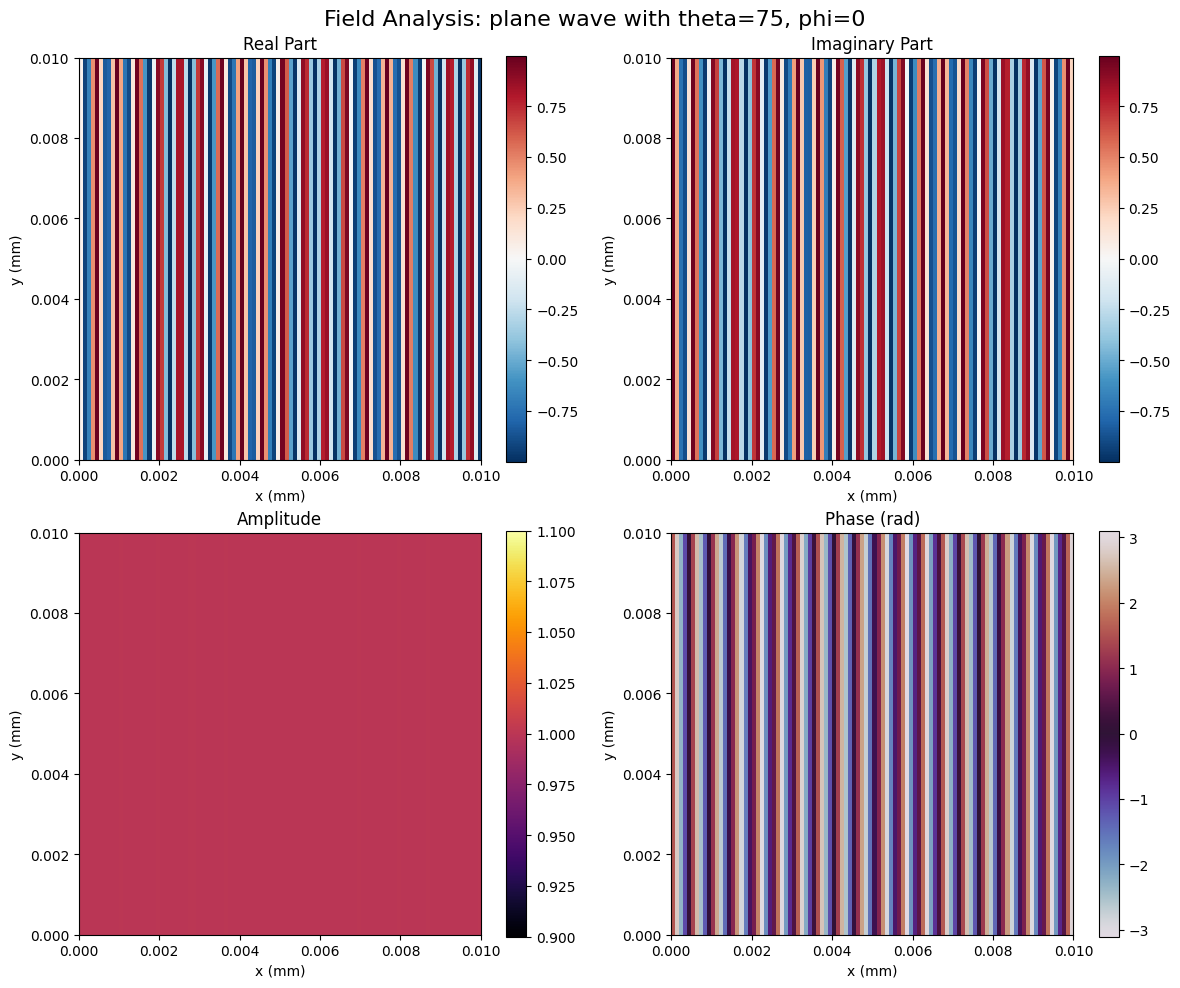

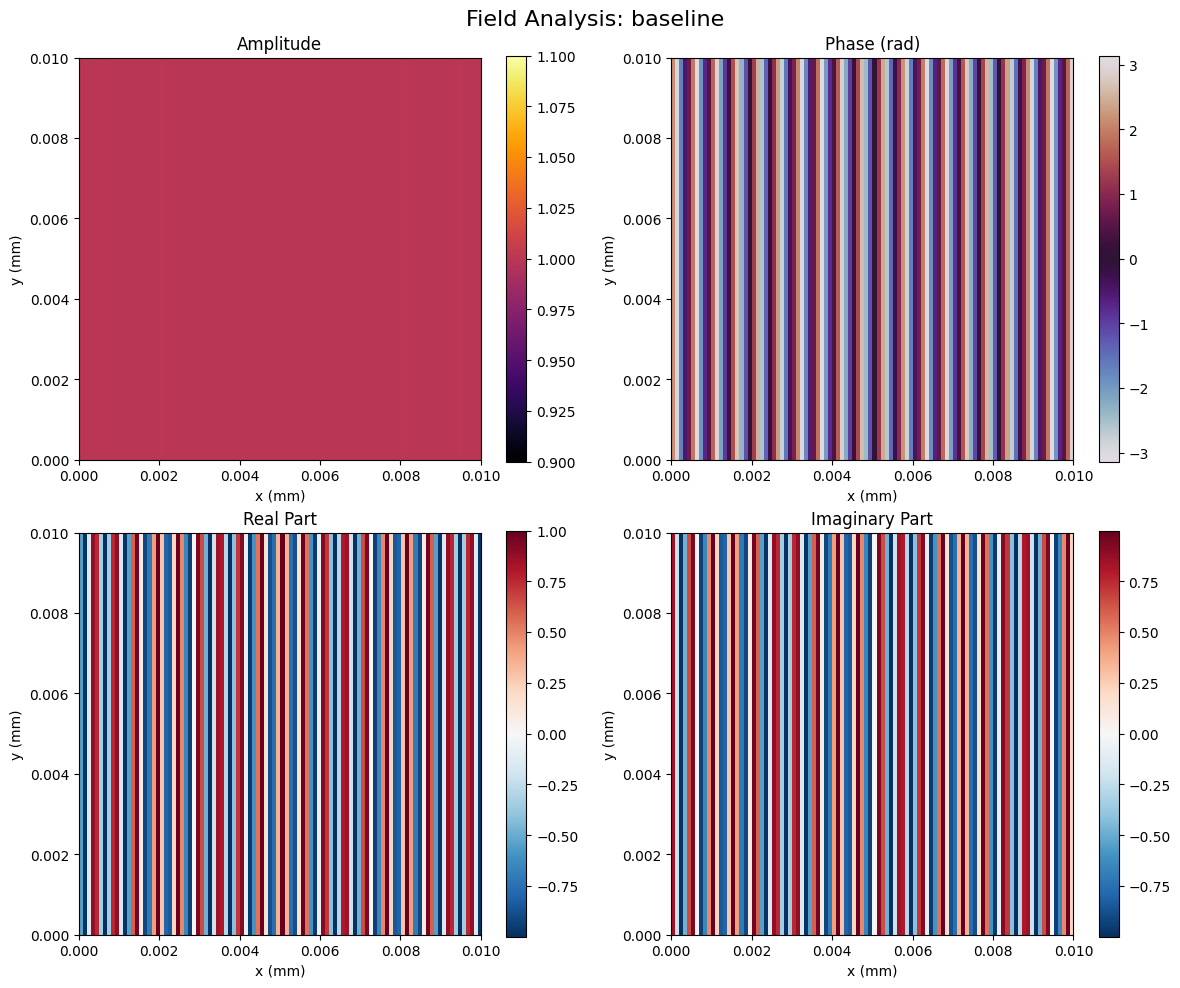

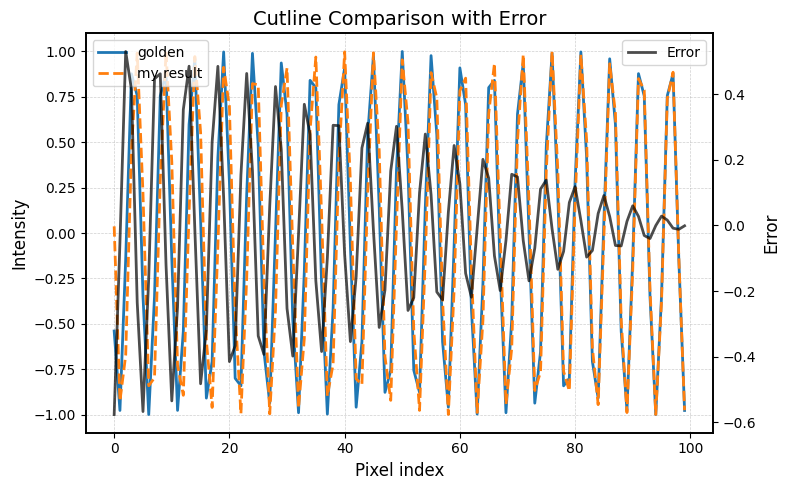

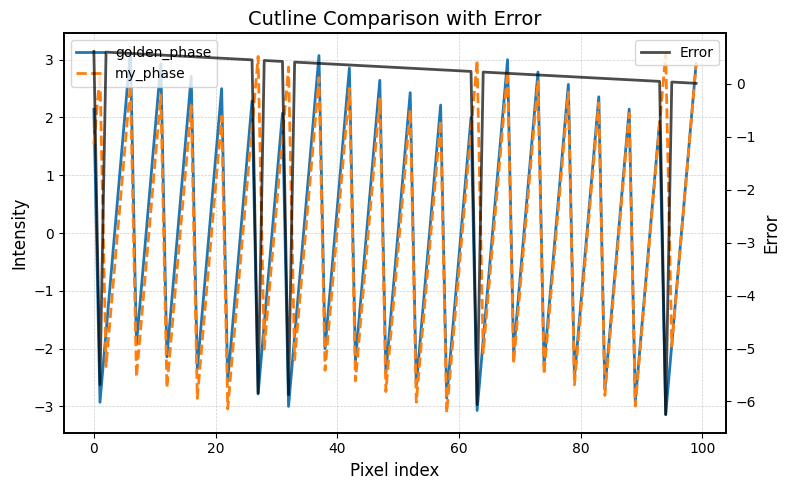

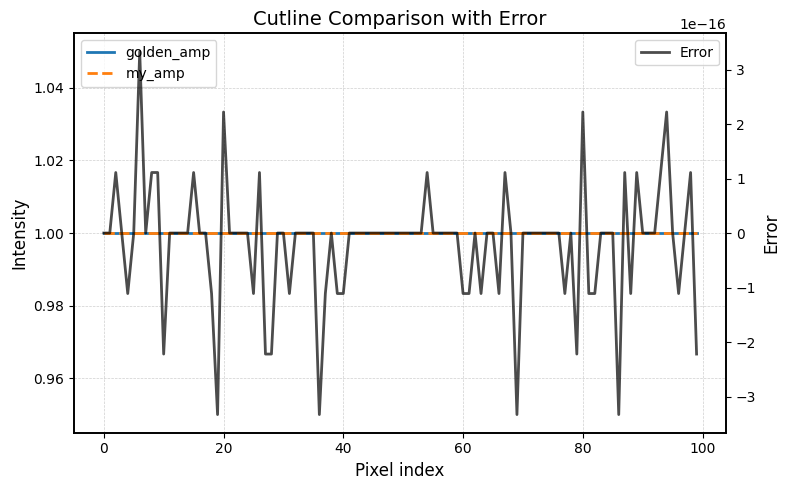

* plane wave with theta=89, phi=0
    max error = 0.6179429757803351


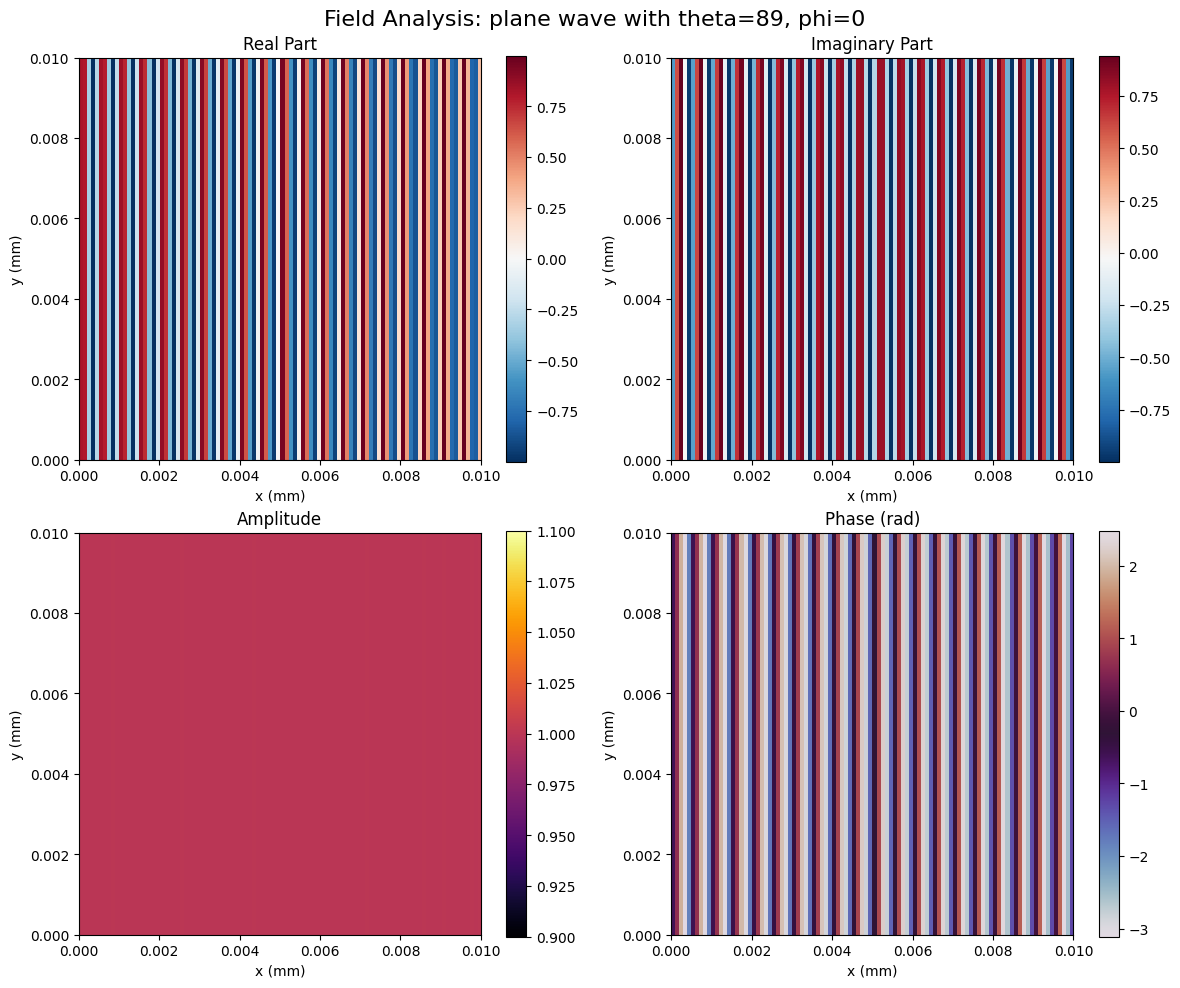

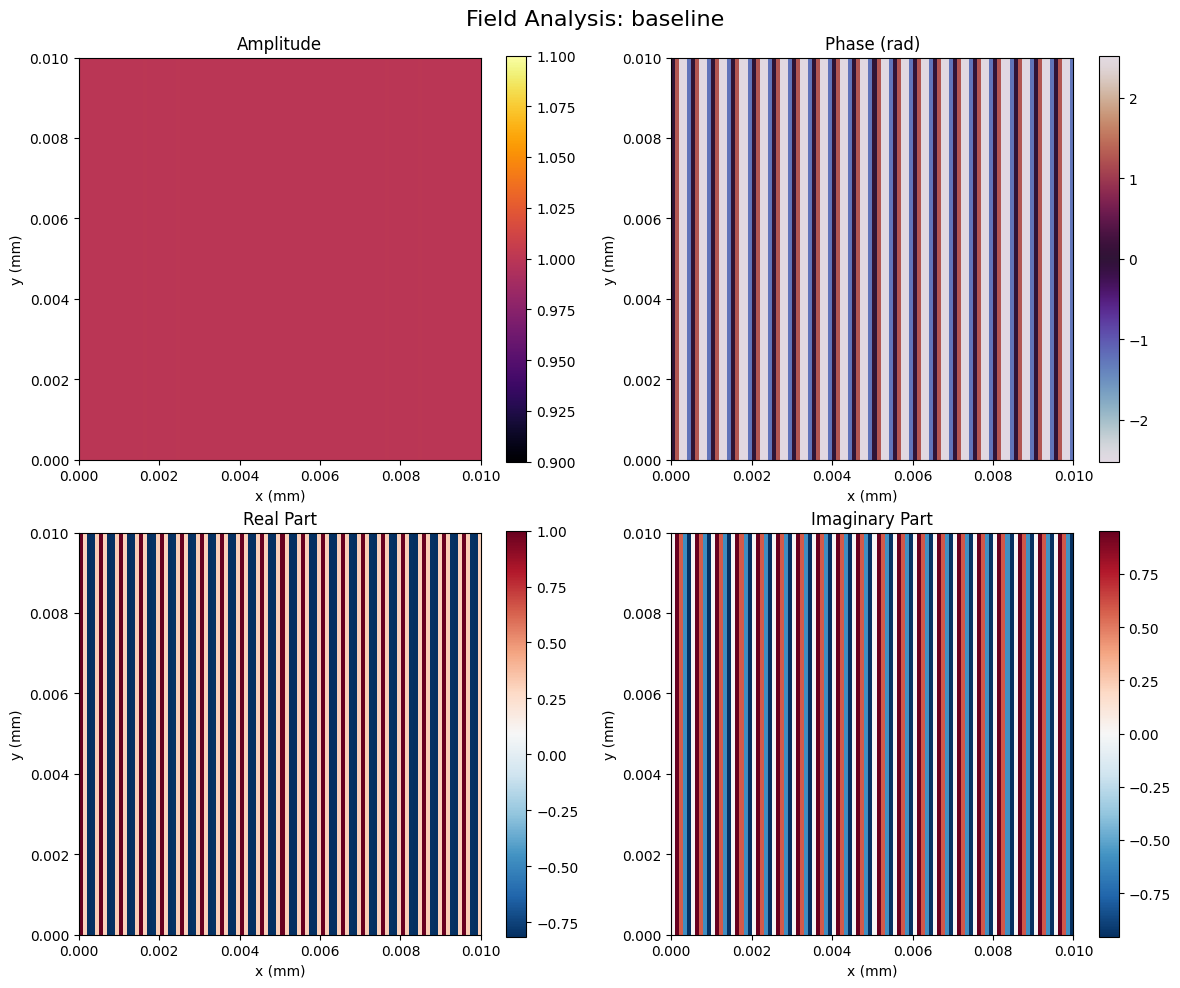

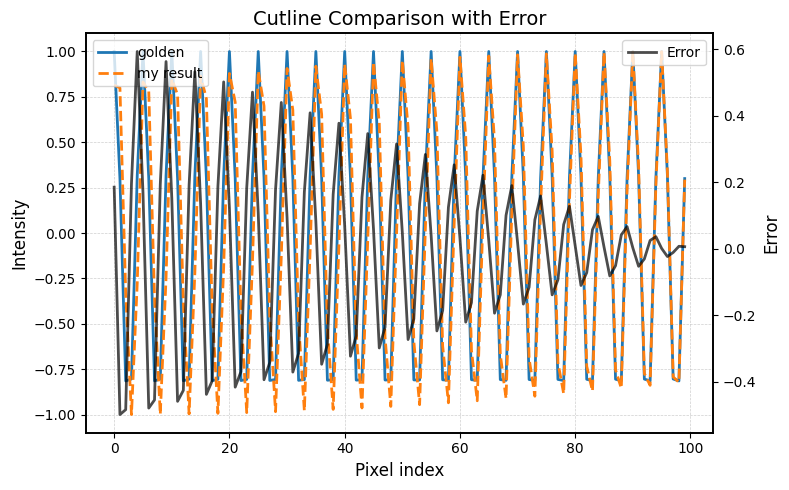

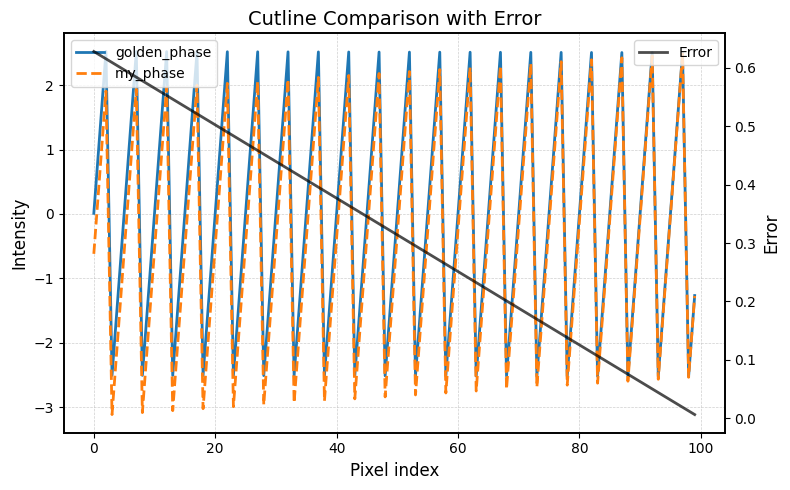

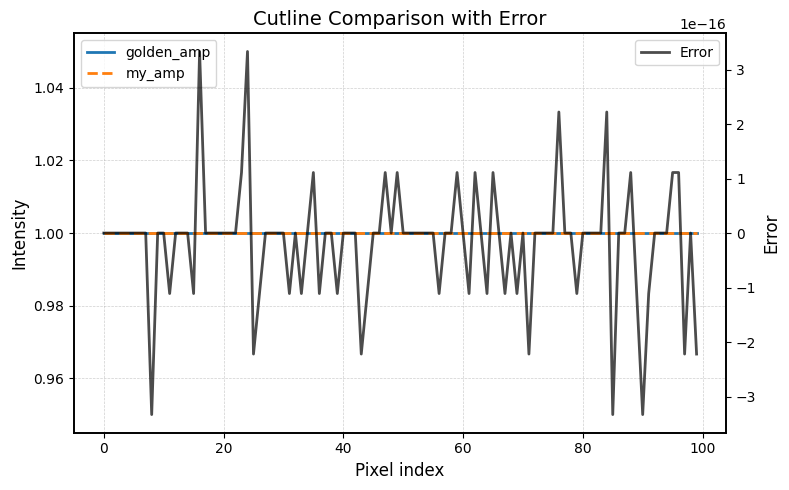

In [8]:
def plane_wave_test(theta, phi):
    assert(0 <= theta and theta < 90)
    print(f"* plane wave with theta={theta}, phi={phi}")
    
    real_start = [a - 0.5*s for a, s in zip(start, step)]
    real_phi = -phi
    # plane_wave_solver
    image = plane_wave_solver.generate(wavelength, theta*degree, real_phi*degree, real_start, end, shape)
    image = np.array(list(image)).reshape(*shape)
    fig = show_complex_plot(image, meta, f"plane wave with theta={theta}, phi={phi}", display_pos)
    
    # baseline
    baseline = f"{notebook_dir}/golden_data/{theta}_{phi}.fin"
    baseline_meta, baseline = parse_file(baseline)

    # error image
    # error_abs   = np.abs(np.abs(baseline) - np.abs(image))
    # error_angle = np.abs(np.angle(baseline) - np.angle(image))

    # error = error_abs + error_angle
    # max_error = np.max(error)

    # image = shift(image, *[s/2 for s in step])
    # error = (image/baseline)
    # max_error = np.max(np.abs(error) - 1)
    error = baseline-image
    max_error = np.max(np.abs(error))

    print(f"    max error = {max_error}")
    if max_error > 1e-6:
        a, b = get_cutline(baseline, shape[0]//2), get_cutline(image, shape[0]//2)
        show_golden_image = True
        if show_golden_image:
            fig = show_complex_plot(baseline, baseline_meta, "baseline", [[1, 0], [1, 1], [0,0], [0,1]])
            # fig = show_complex_plot(error, baseline_meta, f"max_error={max_error}", display_pos)
        plot_cutlines_with_error(a, b, "golden", "my result")
        plot_cutlines_with_error(np.angle(a), np.angle(b), "golden_phase", "my_phase")
        plot_cutlines_with_error(np.abs(a), np.abs(b), "golden_amp", "my_amp")

for theta, phi in [[30, 0], [45, 0],[75, 0], [89, 0]]:
    plane_wave_test(theta, phi)

# for theta, phi in [[30, 0], [30, 30], [30, 60], [30, 90], [30,120],[30,150],[30,180]]:
#     plane_wave_test(theta, phi)


# for theta, phi in [[20, 30], [10, 45]]:
#     plane_wave_test(theta, phi)
